In [4]:
import pandas as pd
import re
import networkx as nx
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
#For the simplicity of this analysis, I'll only be using the first data set. More interesting patterns could be
#discovered when using all the available data, however. Please note that there are also tweets in Russian, which
#will need additional processing.
#Data can be found here: https://github.com/fivethirtyeight/russian-troll-tweets
tweets1 = pd.read_csv("~/Downloads/IRAhandle_tweets_1.csv")
#tweets2 = pd.read_csv("~/Downloads/IRAhandle_tweets_2.csv")
#tweets3 = pd.read_csv("~/Downloads/IRAhandle_tweets_3.csv")
#tweets4 = pd.read_csv("~/Downloads/IRAhandle_tweets_4.csv")
#tweets5 = pd.read_csv("~/Downloads/IRAhandle_tweets_5.csv")
#tweets6 = pd.read_csv("~/Downloads/IRAhandle_tweets_6.csv")
#tweets7 = pd.read_csv("~/Downloads/IRAhandle_tweets_7.csv")
#tweets8 = pd.read_csv("~/Downloads/IRAhandle_tweets_8.csv")
tweets = tweets1

In [11]:
#Inspecting the dataset:
tweets.head(10)

external_author_id  author  \
0  906000000000000000  10_GOP   
1  906000000000000000  10_GOP   
2  906000000000000000  10_GOP   
3  906000000000000000  10_GOP   
4  906000000000000000  10_GOP   
5  906000000000000000  10_GOP   
6  906000000000000000  10_GOP   
7  906000000000000000  10_GOP   
8  906000000000000000  10_GOP   
9  906000000000000000  10_GOP   

                                             content   region language  \
0  "We have a sitting Democrat US Senator on tria...  Unknown  English   
1  Marshawn Lynch arrives to game in anti-Trump s...  Unknown  English   
2  Daughter of fallen Navy Sailor delivers powerf...  Unknown  English   
3  JUST IN: President Trump dedicates Presidents ...  Unknown  English   
4  19,000 RESPECTING our National Anthem! #StandF...  Unknown  English   
5  Dan Bongino: "Nobody trolls liberals better th...  Unknown  English   
6                        🐝🐝🐝 https://t.co/MorL3AQW0z  Unknown  English   
7  '@SenatorMenendez @CarmenYulinCruz Doesn't mat...  Unknown  English   
8  As much as I hate promoting CNN article, here ...  Unknown  English   
9  After the 'genocide' remark from San Juan Mayo...  Unknown  English   

      publish_date   harvested_date  following  followers  updates    ...      \
0  10/1/2017 19:58  10/1/2017 19:59       1052       9636      253    ...       
1  10/1/2017 22:43  10/1/2017 22:43       1054       9637      254    ...       
2  10/1/2017 22:50  10/1/2017 22:51       1054       9637      255    ...       
3  10/1/2017 23:52  10/1/2017 23:52       1062       9642      256    ...       
4   10/1/2017 2:13   10/1/2017 2:13       1050       9645      246    ...       
5   10/1/2017 2:47   10/1/2017 2:47       1050       9644      247    ...       
6   10/1/2017 2:48   10/1/2017 2:48       1050       9644      248    ...       
7   10/1/2017 2:52   10/1/2017 2:53       1050       9644      249    ...       
8   10/1/2017 3:47   10/1/2017 3:47       1050       9646      250    ...       
9   10/1/2017 3:51   10/1/2017 3:51       1050       9646      251    ...       

  account_type retweet  account_category new_june_2018     alt_external_id  \
0        Right       0        RightTroll             0  905874659358453760   
1        Right       0        RightTroll             0  905874659358453760   
2        Right       1        RightTroll             0  905874659358453760   
3        Right       0        RightTroll             0  905874659358453760   
4        Right       1        RightTroll             0  905874659358453760   
5        Right       0        RightTroll             0  905874659358453760   
6        Right       1        RightTroll             0  905874659358453760   
7        Right       0        RightTroll             0  905874659358453760   
8        Right       0        RightTroll             0  905874659358453760   
9        Right       0        RightTroll             0  905874659358453760   

             tweet_id                                        article_url  \
0  914580356430536707  http://twitter.com/905874659358453760/statuses...   
1  914621840496189440  http://twitter.com/905874659358453760/statuses...   
2  914623490375979008  http://twitter.com/905874659358453760/statuses...   
3  914639143690555392  http://twitter.com/905874659358453760/statuses...   
4  914312219952861184  http://twitter.com/905874659358453760/statuses...   
5  914320835325853696  http://twitter.com/905874659358453760/statuses...   
6  914321156466933760  http://twitter.com/905874659358453760/statuses...   
7  914322215537119234  http://twitter.com/905874659358453760/statuses...   
8  914335818503933957  http://twitter.com/905874659358453760/statuses...   
9  914336862730375170  http://twitter.com/905874659358453760/statuses...   

                                          tco1_step1 tco2_step1 tco3_step1  
0  https://twitter.com/10_gop/status/914580356430...        NaN        NaN  
1  https://twitter.com/damienwoody/status/9145685...        NaN        NaN  
2  ht

In [10]:
#First, let's create a dictionary that uses the author for the key, and the parsed Twitter handles as its value
adj_matrix = {}

#Defining and saving the regular expression for extracting the handles
p = re.compile(r'@([^\s:]+)')

#Looping over the tweets, and extract both the author and handles for each tweet
for i in range(0, len(tweets["content"])):
    tweet = tweets["content"][i]
    author = tweets["author"][i].lower()
    #Removing punctuation from tweets
    tweet = re.sub(r"(?<!\d)[.,;:'…](?!\d)"," ", tweet)
    #Parsing the handles, and making them lowercase (to facilitate matching)
    handles = p.findall(tweet)
    handles = [handle.lower() for handle in handles]
    #Populating the dictionary
    for handle in handles:
        if author not in adj_matrix.keys():
            adj_matrix[author] = [handle]
        else:
            if handle not in adj_matrix[author]:
                adj_matrix[author].append(handle)

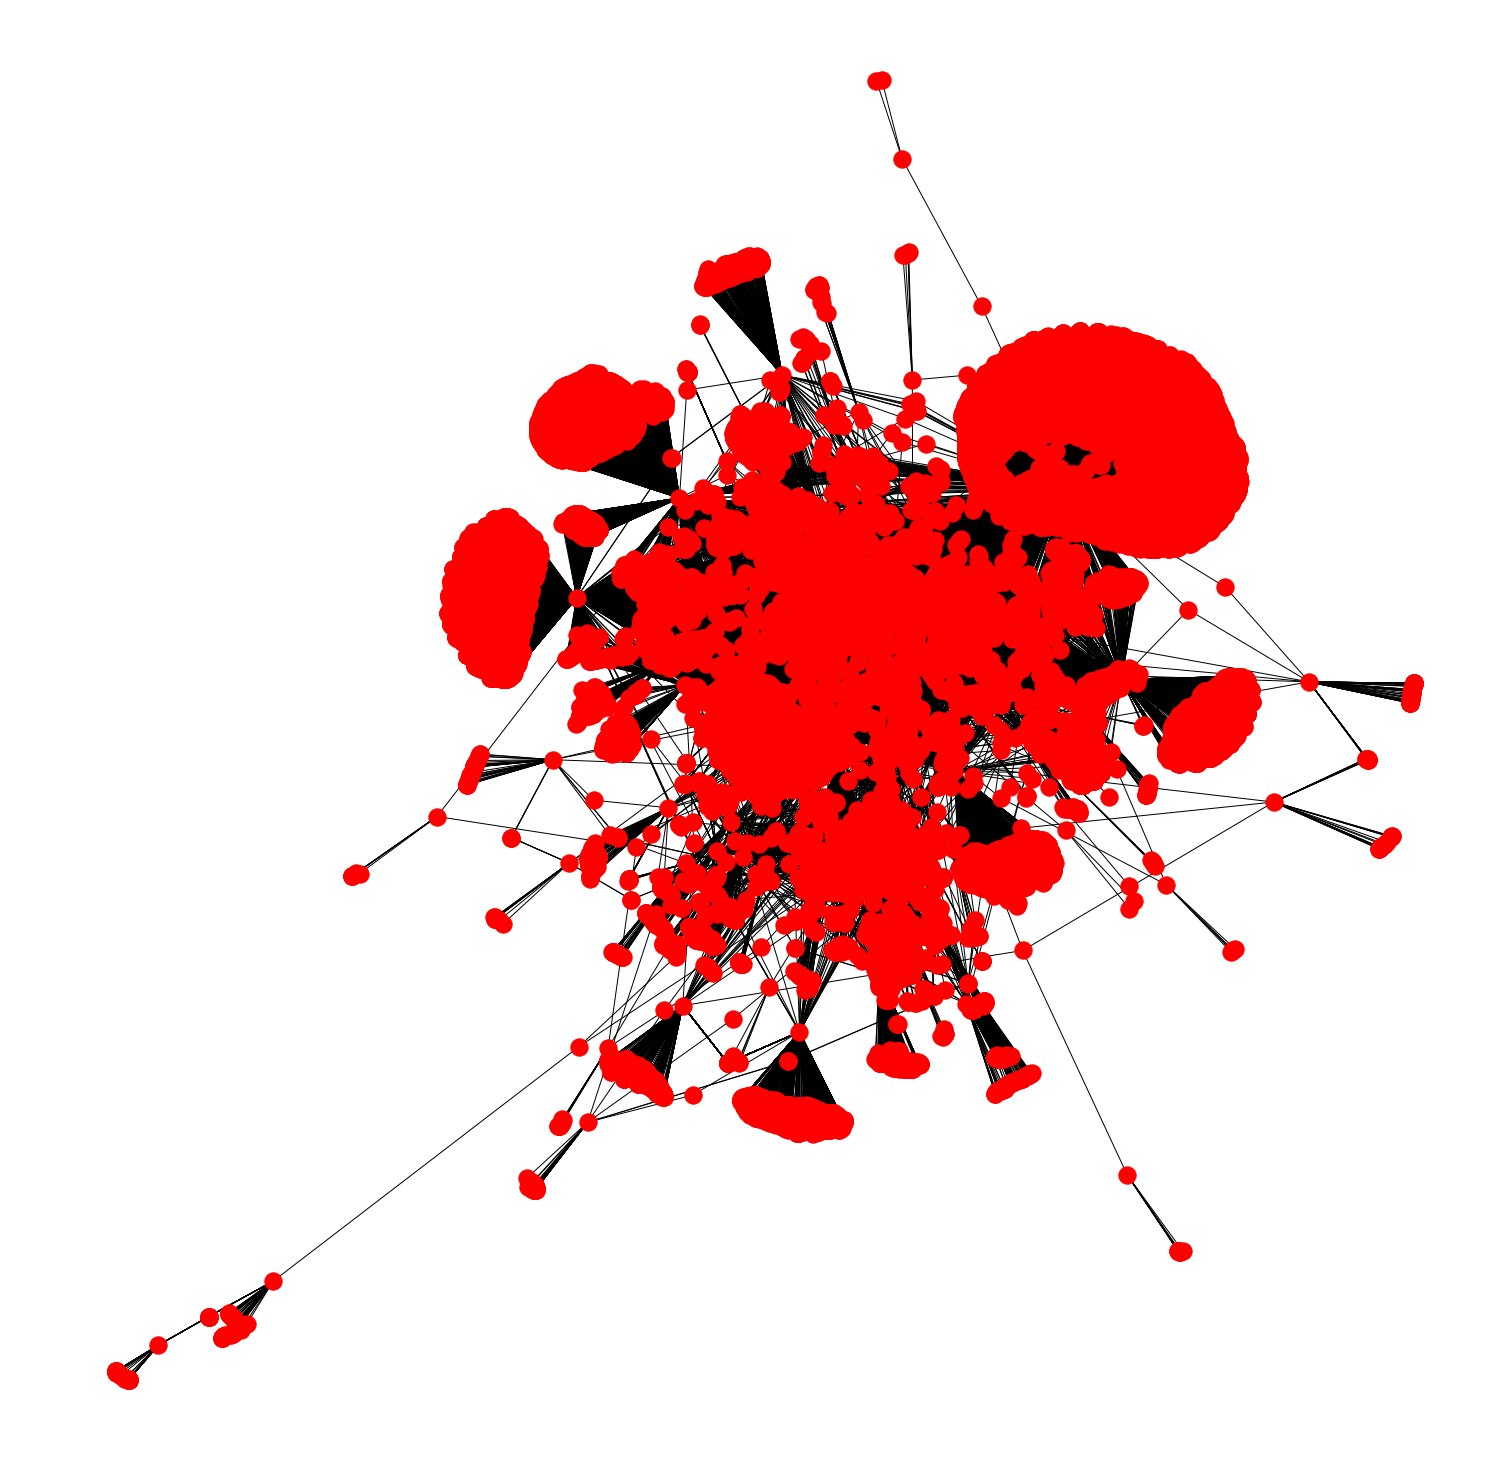

In [123]:
#Initializing the plot
plt.figure(figsize=(20,20))

#Networkx graph
g=nx.from_dict_of_lists(adj_matrix)

#Removing isolates
g.remove_nodes_from(nx.isolates(g))

#Removing isolated subgraphs
cur_graph = g
if not nx.is_connected(cur_graph):
    sub_graphs = list(nx.connected_component_subgraphs(cur_graph))
    main_graph = sub_graphs[0]
    for sg in sub_graphs:
        if len(sg.nodes()) > len(main_graph.nodes()):
            main_graph = sg
    cur_graph = main_graph

#Plotting network graph:
plt.figure(figsize=(20,20)) 
nx.draw(cur_graph,with_labels = False)
plt.draw()
plt.show()

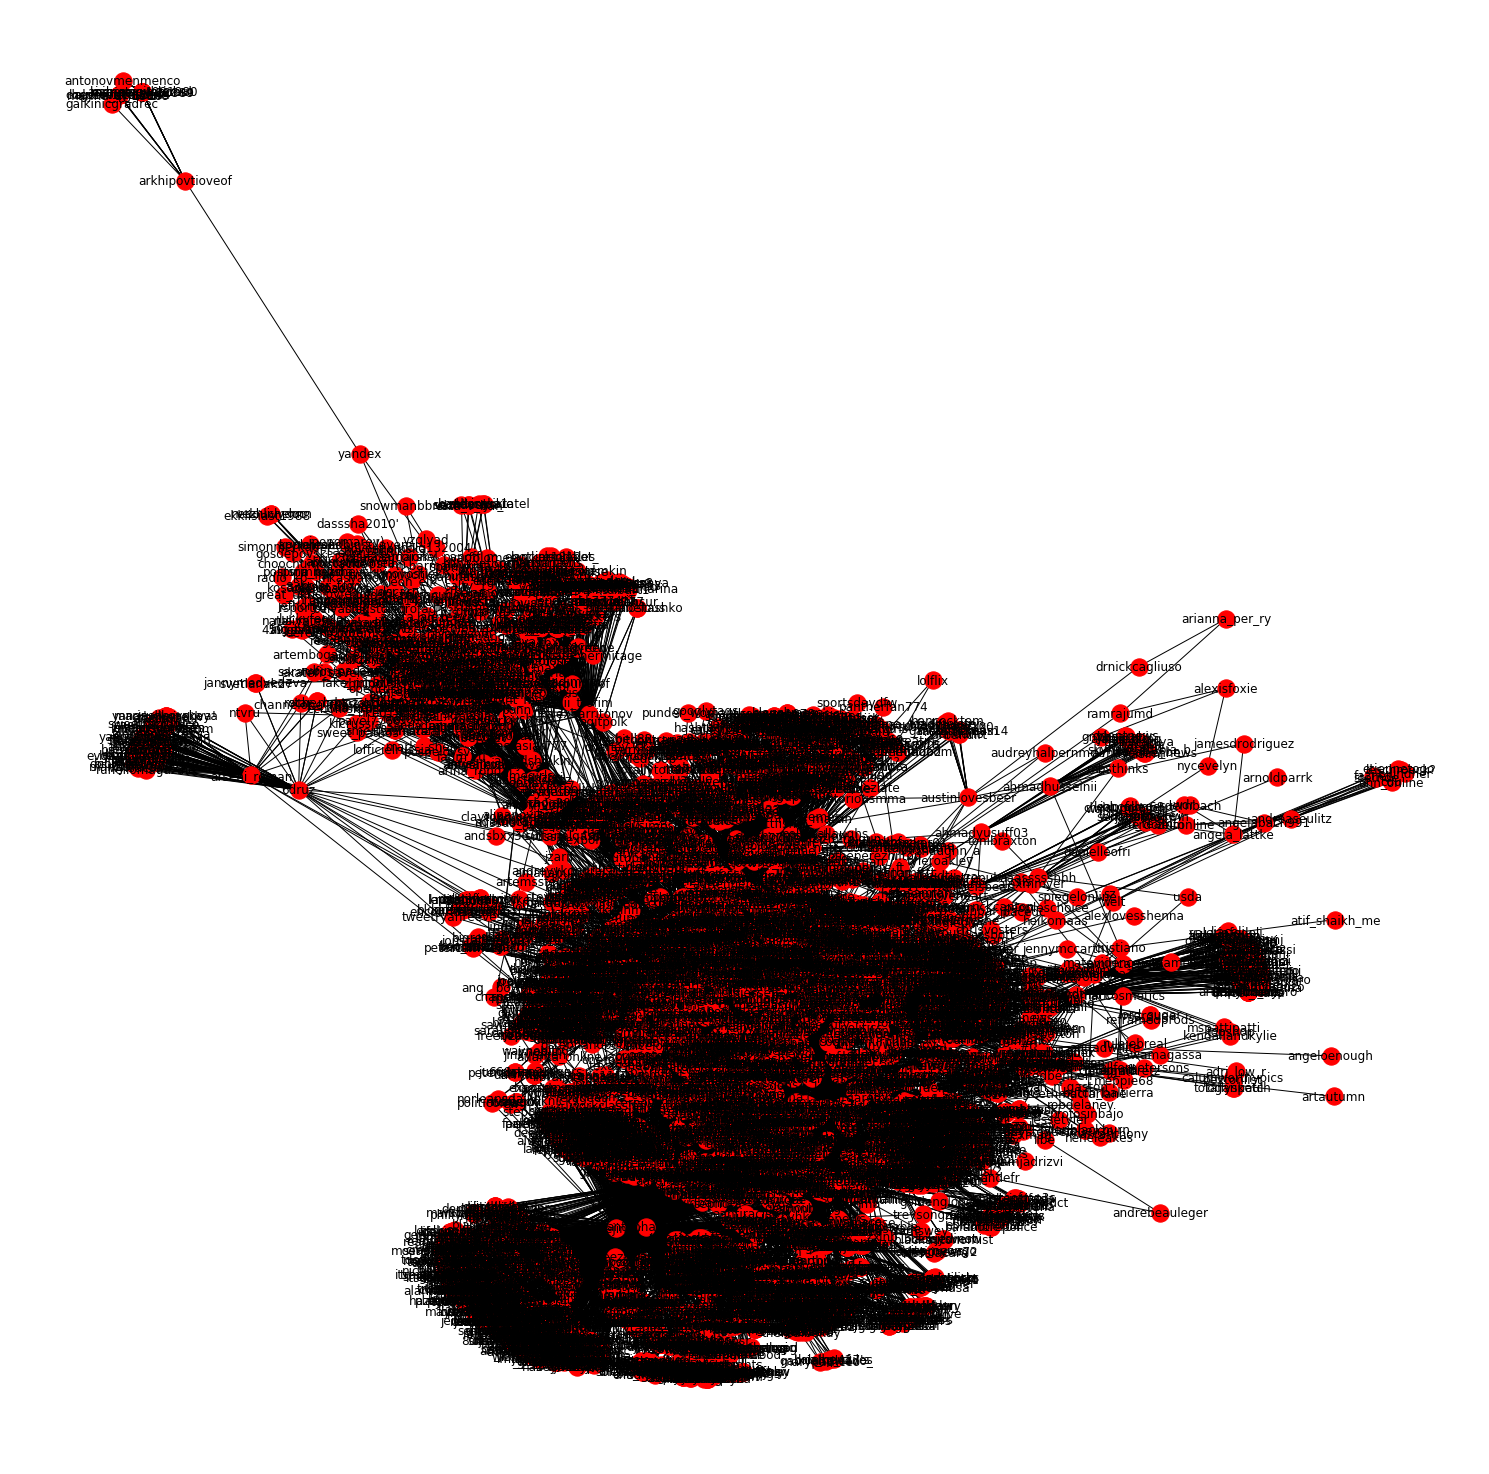

In [124]:
#Let's filter the network graph in order to include only those nodes with 2 or more edges
h = g.copy()
remove = [node for node,degree in dict(h.degree()).items() if degree < 2]
h.remove_nodes_from(remove)
cur_graph = h

#Removing smaller "subgraphs" and isolates:
if not nx.is_connected(cur_graph):
    sub_graphs = list(nx.connected_component_subgraphs(cur_graph))
    main_graph = sub_graphs[0]
    for sg in sub_graphs:
        if len(sg.nodes()) > len(main_graph.nodes()):
            main_graph = sg
    cur_graph = main_graph

#Plotting the network graph:
plt.figure(figsize=(20,20))
nx.draw(cur_graph,with_labels = True)
plt.draw()
plt.show()

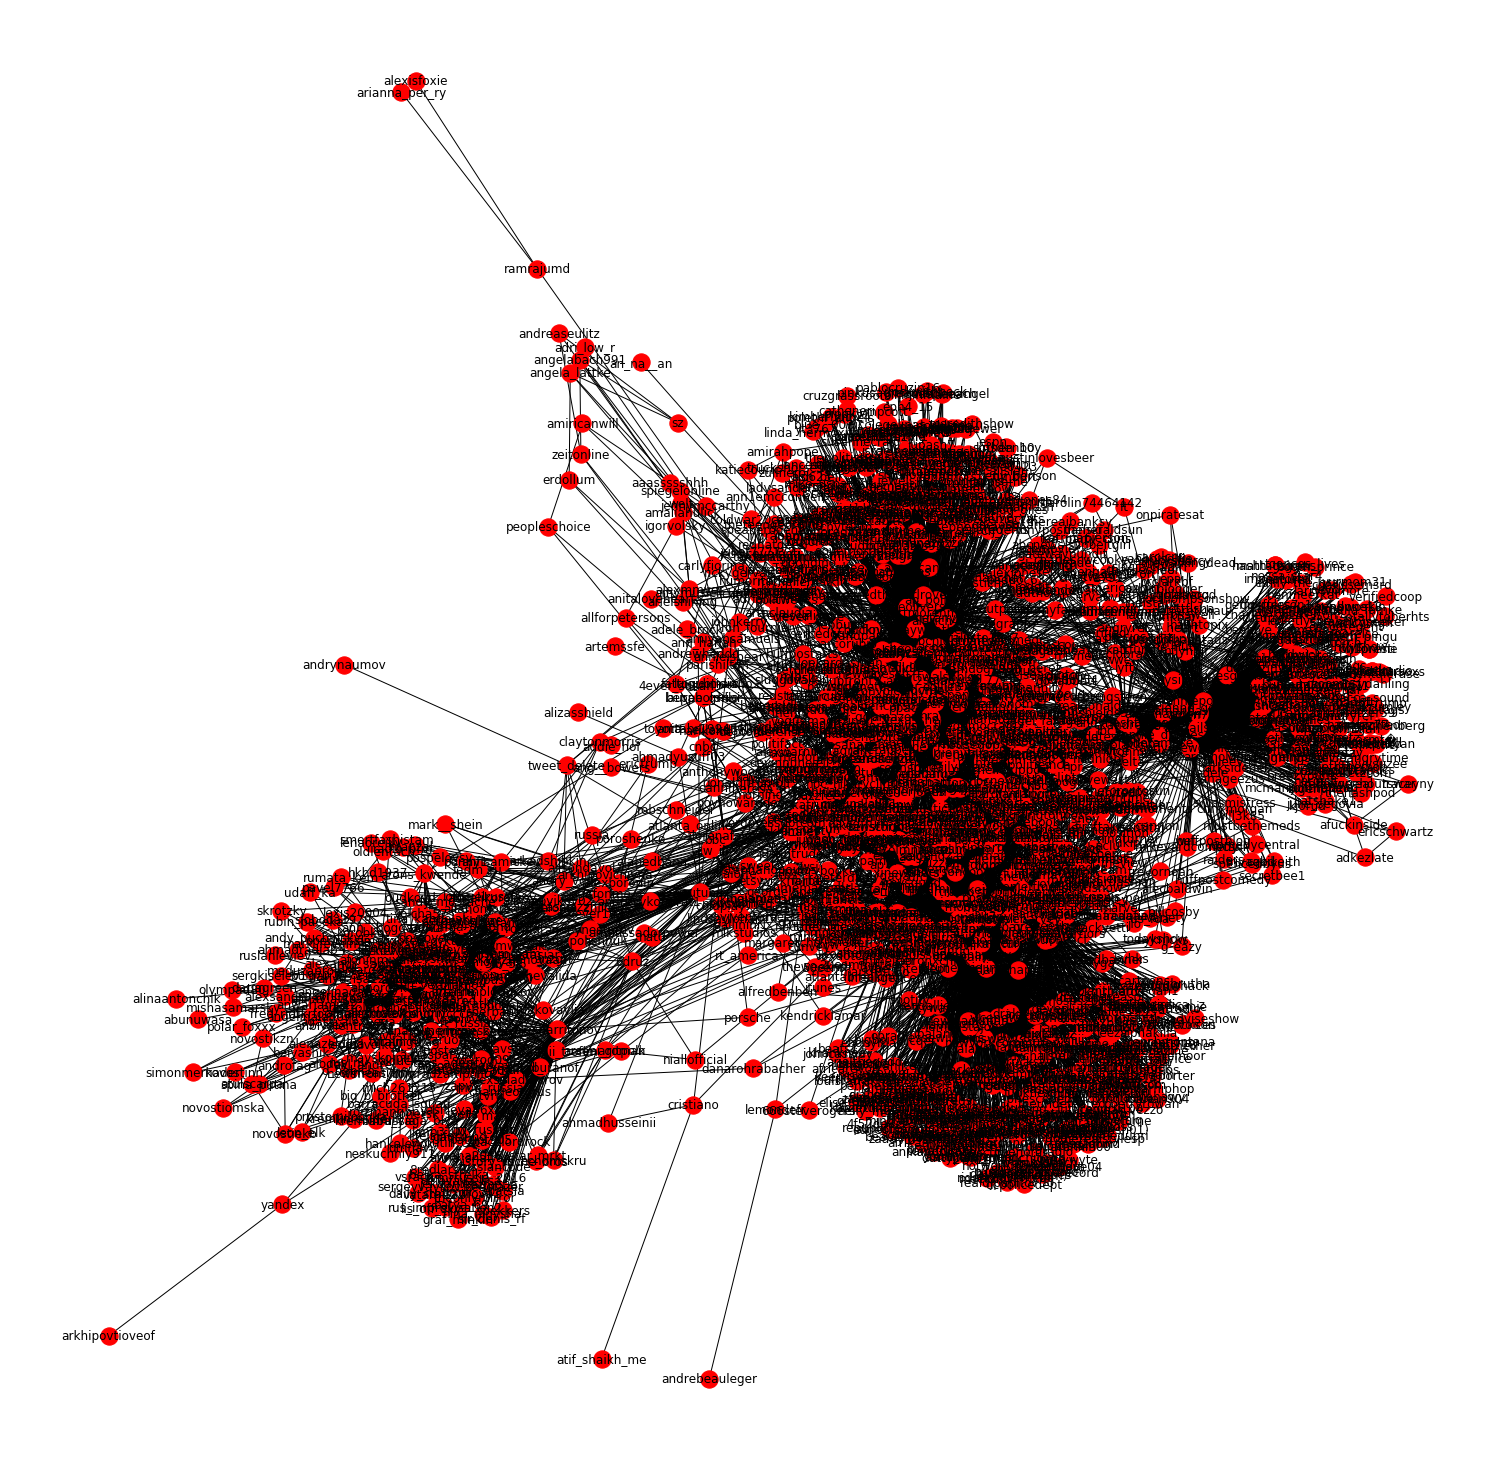

In [125]:
#How about setting the condition to 3 or more?
i = g.copy()
remove = [node for node,degree in dict(i.degree()).items() if degree < 3]
i.remove_nodes_from(remove)
cur_graph = i

if not nx.is_connected(cur_graph):
    sub_graphs = list(nx.connected_component_subgraphs(cur_graph))
    main_graph = sub_graphs[0]
    for sg in sub_graphs:
        if len(sg.nodes()) > len(main_graph.nodes()):
            main_graph = sg
    cur_graph = main_graph
    
plt.figure(figsize=(20,20))
nx.draw(cur_graph,with_labels = True)
plt.draw()
plt.show()

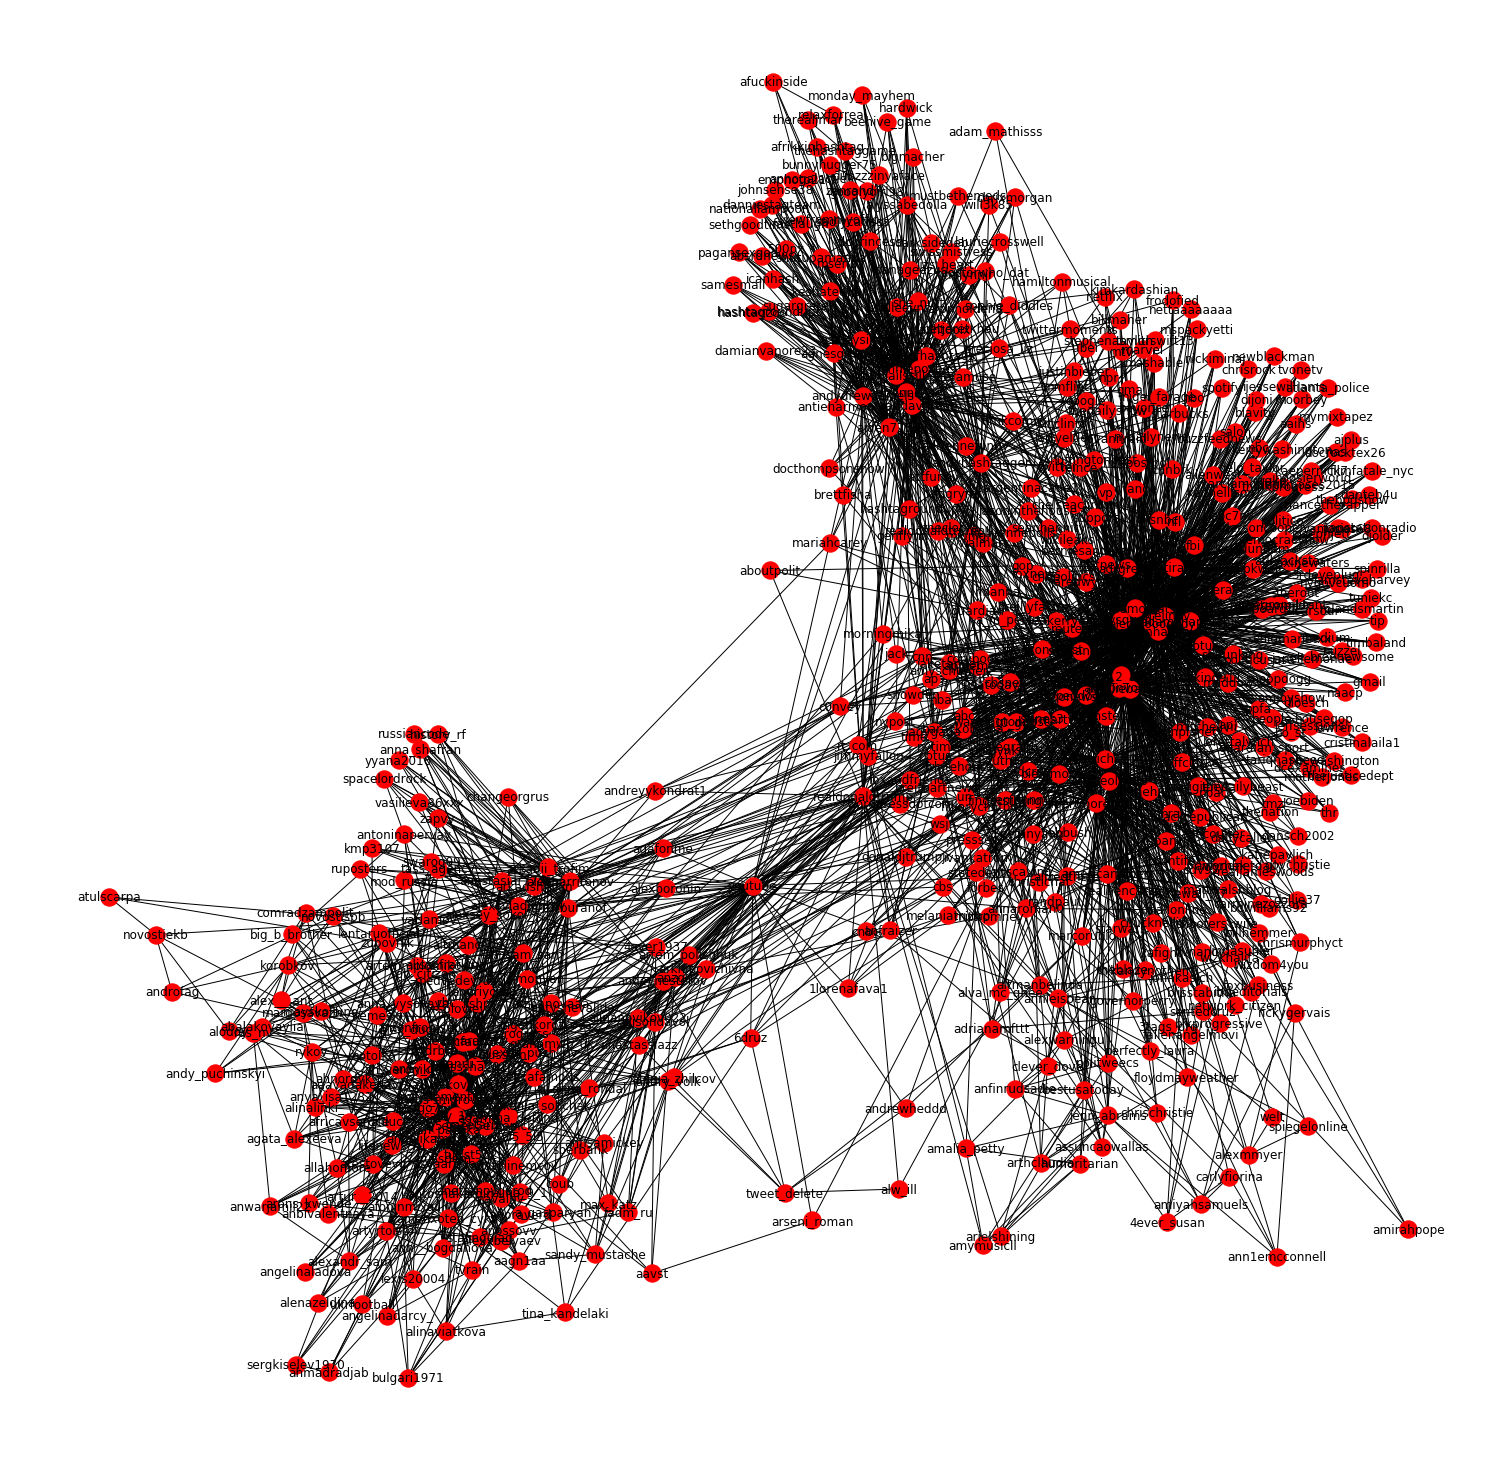

In [126]:
#How about setting the condition to 5 or more?
j = i.copy()
remove = [node for node,degree in dict(j.degree()).items() if degree < 5]
j.remove_nodes_from(remove)
cur_graph = j

if not nx.is_connected(cur_graph):
    sub_graphs = list(nx.connected_component_subgraphs(cur_graph))
    main_graph = sub_graphs[0]
    for sg in sub_graphs:
        if len(sg.nodes()) > len(main_graph.nodes()):
            main_graph = sg
    cur_graph = main_graph
    
plt.figure(figsize=(20,20))
nx.draw(cur_graph,with_labels = True)
plt.draw()
plt.show()

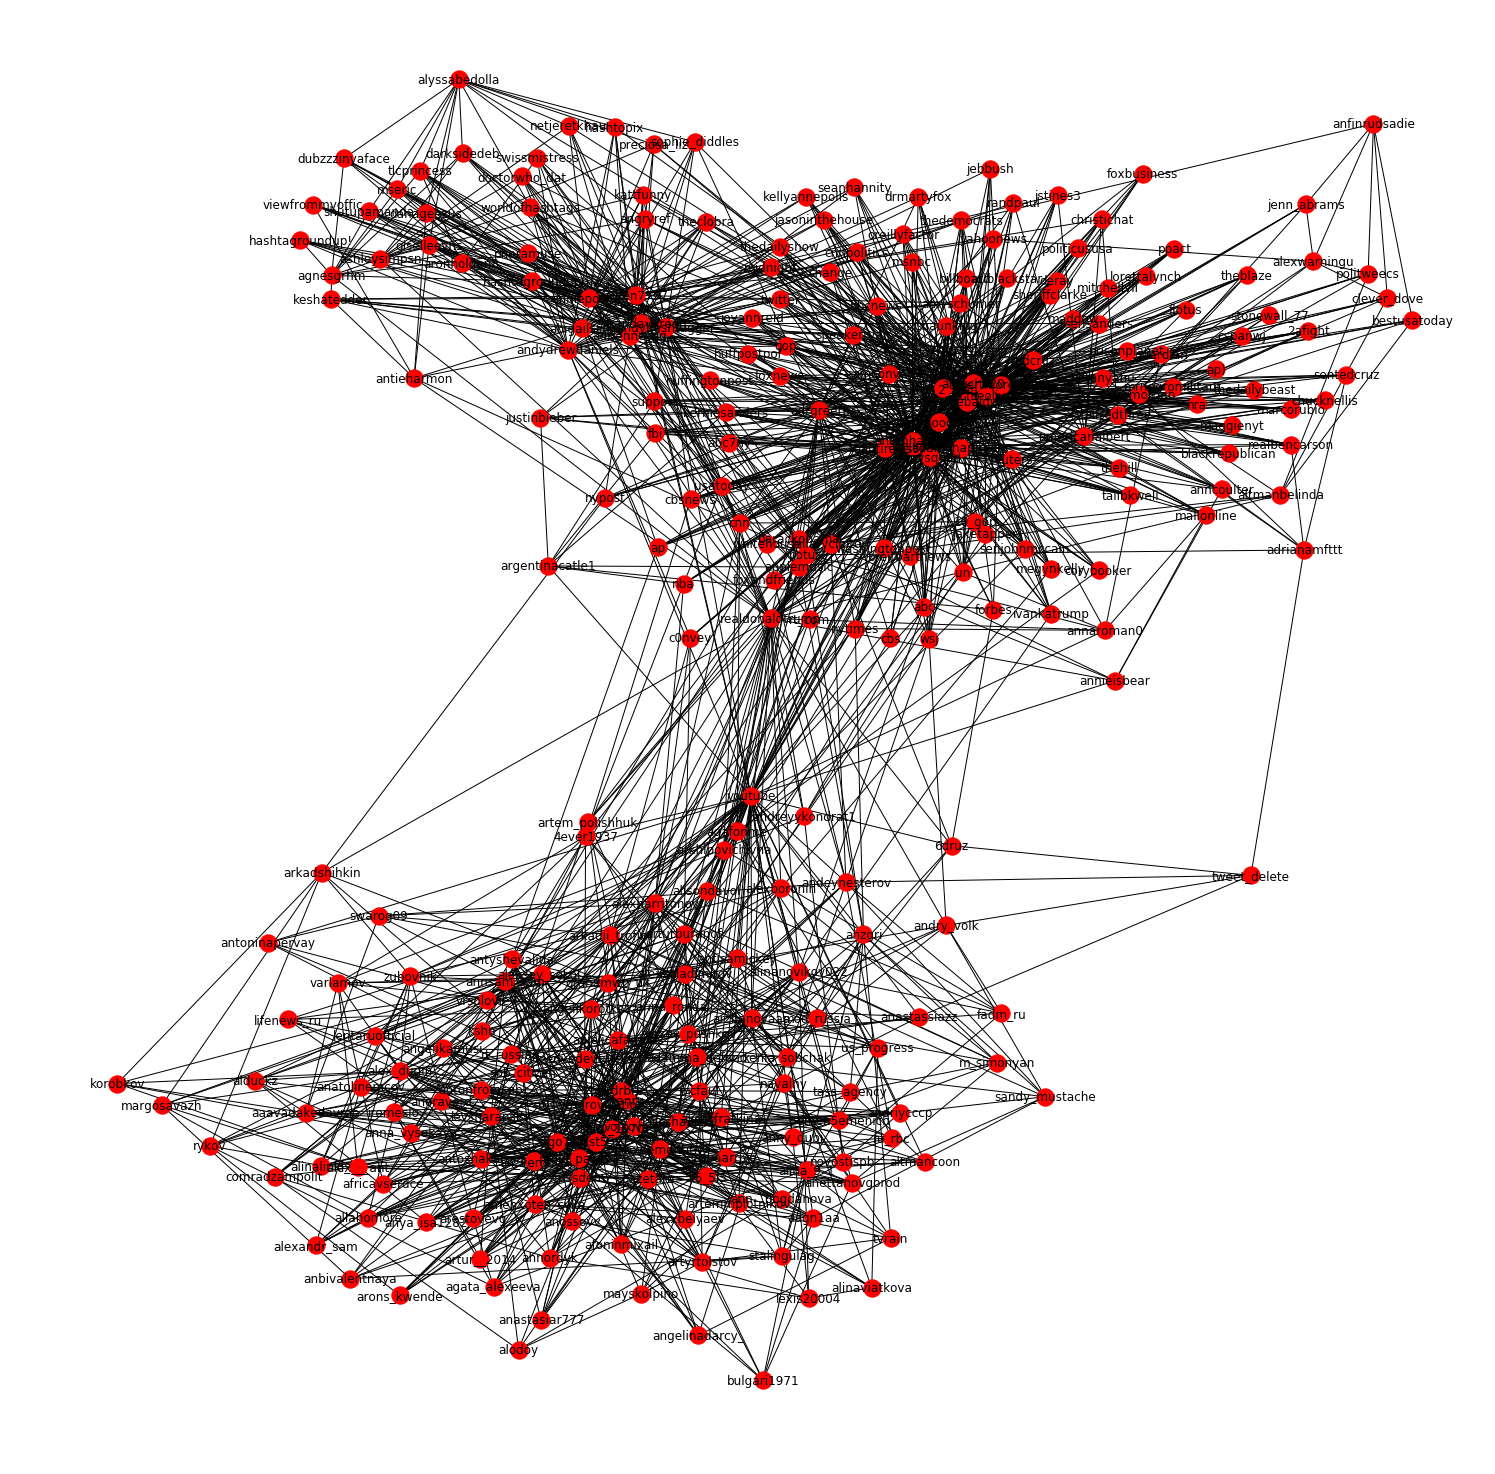

In [127]:
#Setting the condition to 7 or more?
k = j.copy()
remove = [node for node,degree in dict(k.degree()).items() if degree < 7]
k.remove_nodes_from(remove)
cur_graph = k

if not nx.is_connected(cur_graph):
    sub_graphs = list(nx.connected_component_subgraphs(cur_graph))
    main_graph = sub_graphs[0]
    for sg in sub_graphs:
        if len(sg.nodes()) > len(main_graph.nodes()):
            main_graph = sg
    cur_graph = main_graph
    
plt.figure(figsize=(20,20))
nx.draw(cur_graph,with_labels = True)
plt.draw()
plt.show()

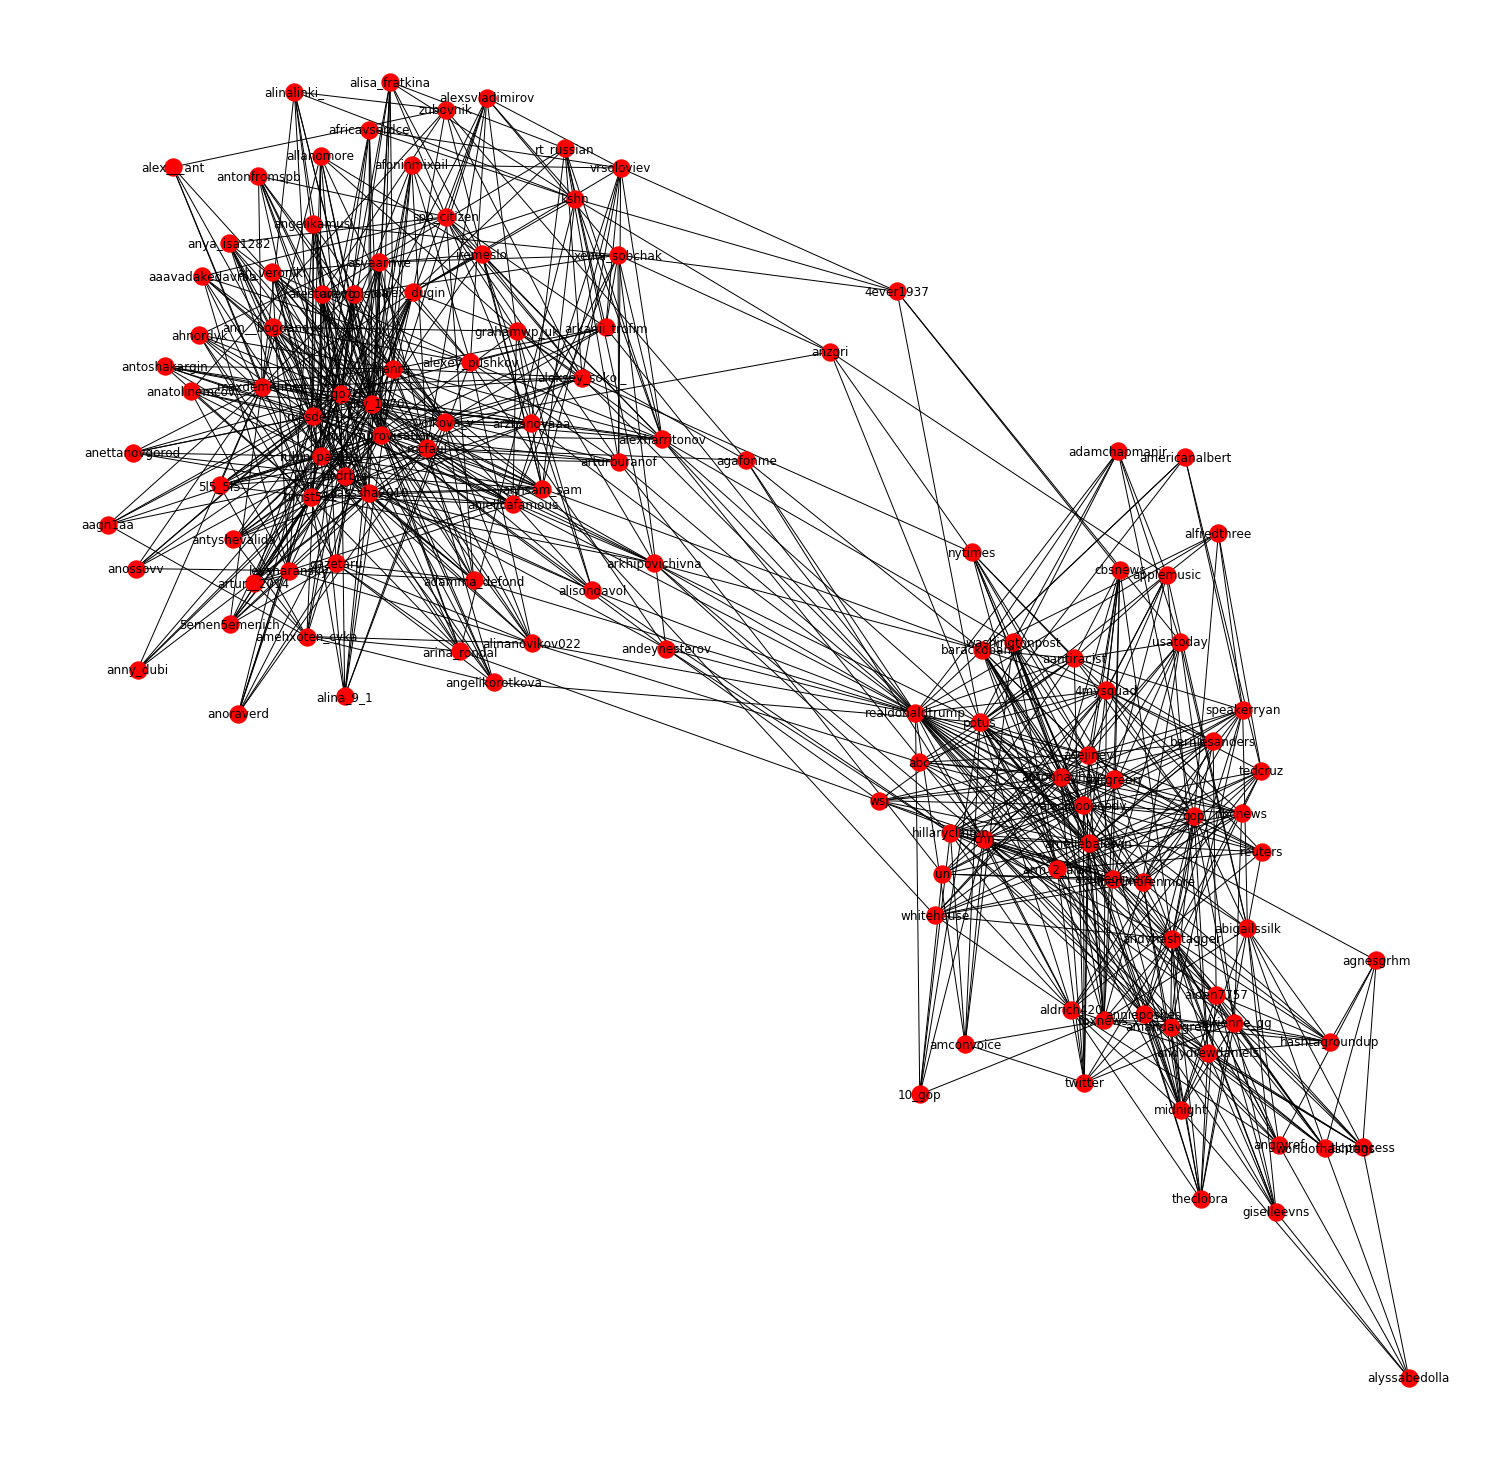

In [135]:
#Setting the condition to 10 or more?
l = k.copy()
remove = [node for node,degree in dict(l.degree()).items() if degree < 10]
l.remove_nodes_from(remove)
l.remove_node("youtube")
cur_graph = l

if not nx.is_connected(cur_graph):
    sub_graphs = list(nx.connected_component_subgraphs(cur_graph))
    main_graph = sub_graphs[0]
    for sg in sub_graphs:
        if len(sg.nodes()) > len(main_graph.nodes()):
            main_graph = sg
    cur_graph = main_graph
    
plt.figure(figsize=(20,20))
nx.draw(cur_graph,with_labels = True)
plt.draw()
plt.show()

In [9]:
#Let's have a look at the most frequently used hashtags:
hashtags = dict()
for text in tweets['content']:
    text = re.sub(r"(?<!\d)[.,;:$'…](?!\d)"," ", text)
    HT = [i  for i in text.split() if i.startswith("#")]
    for tag in HT:
        if tag not in hashtags.keys():
            hashtags[tag] = 1
        else:
            hashtags[tag] += 1   
sorted_by_value = sorted(hashtags.items(), key=lambda kv: kv[1], reverse = True)
del hashtags['#']

HashTags = pd.DataFrame({"Tag":list(hashtags.keys()),"Frequency":list(hashtags.values())})
HashTags = HashTags.sort_values(by = "Frequency", ascending = False)
HashTags.head(50)

Frequency                Tag
15901       2914               #amb
4           2897              #MAGA
3399        2124              #news
4646        1754             #PJNET
1821        1580  #BlackLivesMatter
7483        1446              #USFA
1803        1215              #tcot
31201       1015              #arre
31200       1015               #ara
15010        966               #lis
15009        966              #alis
8389         931              #aded
8388         931               #ade
119          797             #Trump
26433        786             #tisda
31096        744               #arb
31095        744              #arbt
4647         669              #TCOT
6968         639            #sports
5834         586          #breaking
4024         579        #NowPlaying
7869         558             #local
25388        522           #andrrre
16124        510           #amberli
16125        510             #amber
24814        508              #amms
24815        508              #amis
25379        507            #andris
28319        507            #joness
4752         502      #ObamaNextJob
26399        501              #flig
2270         494          #politics
9549         487             #alexx
9548         487             #aleex
15140        486           #albanis
15139        486              #alba
1853         486   #PoliceBrutality
6272         476     #WakeUpAmerica
26646        458           #anisiss
24919        455              #aamy
24918        455             #anche
25088        445               #Ame
8390         442              #adee
26132        442            #angiis
24944        441             #aniss
24943        441            #anissd
33580        439            #fellon
4869         437             #ABISS
4868         437               #abi
14587        437            #alexdr